<a href="https://colab.research.google.com/github/conradmutai/DeepLearningSpecializationNotebooks/blob/main/Problems_7_16_and_7_17.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Problem 7.16 - 7.17 From Understanding Deep Learning Book

Import PyTorch and several tools from the framework

In [60]:
import torch, torch.nn as nn
import matplotlib.pyplot as plt
import numpy as np
from torch.utils.data import TensorDataset, DataLoader
from torch.optim.lr_scheduler import StepLR

We need to then initialize the size of the input and output layers in addition to the number of hidden layers and their sizes.

In [61]:
# define input size, hidden layer size, output size
D_i, D_k, D_o = 10, 40, 5

Now we have to create a model for this to operation.

In [62]:
# a sequential model means that the layers will run after another
model = nn.Sequential(
    nn.Linear(D_i, D_k), # Creates input layer
    nn.ReLU(),
    nn.Linear(D_k, D_k), # Pre-activation layer taking values from the previous layer
    nn.ReLU(),
    nn.Linear(D_k, D_o) # output layer
)

Now we need to commence the He intialization of the weights. Meaning that the variance will change based on the layers providing a change in weights in order to prevent the vanishing gradient problem from occuring when training the data set.

In [63]:
# He initialization of weights
# sets initial value for the weights
def weights_init(layer_in):
  # checks if this is a linear layer
  if isinstance(layer_in, nn.Linear):
    # function for He initialization in the form of normal distribution
    nn.init.kaiming_normal_(layer_in.weight)
    # initializes the bias as zero
    layer_in.bias.data.fill_(0.0)
# applies the initial weight to the model
model.apply(weights_init)

Sequential(
  (0): Linear(in_features=10, out_features=40, bias=True)
  (1): ReLU()
  (2): Linear(in_features=40, out_features=40, bias=True)
  (3): ReLU()
  (4): Linear(in_features=40, out_features=5, bias=True)
)

Proceeding that we have to choose a least squares loss function, construct a Stochastic Gradient Descent algorithm and initialize a learning rate and momentum before we start the procedure of training the algorithm.

In [64]:
# choose least squares loss function
criterion = nn.MSELoss()
# construct SGD optimizer and initliaze learning rate and momentum
optimizer = torch.optim.SGD(model.parameters(), lr=0.1, momentum=0.9)

Dynamically reduce the learning rate every 10 epochs (every 10 batches that has run through the network)

In [65]:
# object that decreases learning rate by half every 10 epochs
scheduler = StepLR(optimizer, step_size=10, gamma=0.5)

For this data set we will randomly choose 100 random data points and store it in a data loader class.

In [66]:
x = torch.randn(100, D_i)
y = torch.randn(100, D_o)
data_loader = DataLoader(TensorDataset(x, y), batch_size=10, shuffle=True)

We need to create a list that stores the epochs and the losses in order to plot it.

In [67]:
epoch_loss_list = []

After initializing everything we can now run the model.

In [68]:
# loop over the dataset 100 times thus covering every input from x dataset
for epoch in range(100):
  epoch_loss = 0.0
  # loop over batches
  for i, data in enumerate(data_loader):
    # retrieve inputs and labels for this batch
    x_batch, y_batch = data
    # zero the parameter gradients
    optimizer.zero_grad()
    # forward pass
    pred = model(x_batch)
    loss = criterion(pred, y_batch)
    # backward pass
    loss.backward()
    # SGD update
    optimizer.step()
    # update statistics
    epoch_loss += loss.item()

  # add epochs to a list
  average_loss = epoch_loss / len(data_loader)
  epoch_loss_list.append(average_loss)
  # print error
  print(f'Epoch {epoch:5d}, loss {epoch_loss:.3f}')
  # tell scheduler to consider updating learning rate
  scheduler.step()

Epoch     0, loss 18.130
Epoch     1, loss 9.713
Epoch     2, loss 9.108
Epoch     3, loss 8.710
Epoch     4, loss 8.275
Epoch     5, loss 8.068
Epoch     6, loss 7.770
Epoch     7, loss 7.807
Epoch     8, loss 7.614
Epoch     9, loss 7.651
Epoch    10, loss 7.155
Epoch    11, loss 6.934
Epoch    12, loss 6.833
Epoch    13, loss 6.770
Epoch    14, loss 6.584
Epoch    15, loss 6.455
Epoch    16, loss 6.379
Epoch    17, loss 6.358
Epoch    18, loss 6.288
Epoch    19, loss 6.222
Epoch    20, loss 6.149
Epoch    21, loss 6.086
Epoch    22, loss 6.076
Epoch    23, loss 6.042
Epoch    24, loss 6.024
Epoch    25, loss 5.983
Epoch    26, loss 5.996
Epoch    27, loss 5.944
Epoch    28, loss 5.904
Epoch    29, loss 5.876
Epoch    30, loss 5.839
Epoch    31, loss 5.804
Epoch    32, loss 5.787
Epoch    33, loss 5.750
Epoch    34, loss 5.718
Epoch    35, loss 5.684
Epoch    36, loss 5.671
Epoch    37, loss 5.670
Epoch    38, loss 5.636
Epoch    39, loss 5.623
Epoch    40, loss 5.585
Epoch    41, lo

## Problem 7.16

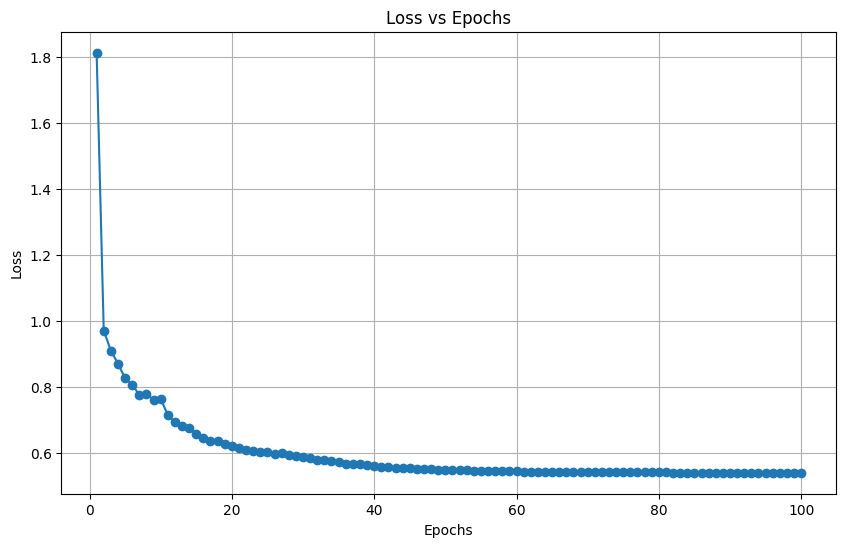

In [69]:
plt.figure(figsize=(10, 6))
plt.plot(range(1, 101), epoch_loss_list, marker='o', linestyle='-')
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Loss vs Epochs")
plt.grid(True)
plt.show()

# Problem 7.17

First we need to change the y training dataset to a binary data set.

In [70]:
y = torch.randint(0, 2, size=(100, D_o)).float()

Secondly, we need to change the network to only predict numbers between 0 and 1.

In [73]:
model = nn.Sequential(
    nn.Linear(D_i, D_k), # Creates input layer
    nn.ReLU(),
    nn.Linear(D_k, D_k), # Pre-activation layer taking values from the previous layer
    nn.ReLU(),
    nn.Linear(D_k, D_o),
    nn.Sigmoid()
)

We also need to change the model loss function to a Binary Cross Entropy Loss function as we need to do this in order to ensure that we are using an appropriate loss model. We can do this by changing `.MSELoss()` to `.BCELoss()`.

In [74]:
# choose binary cross entropy loss function
criterion = nn.BCELoss()
# construct SGD optimizer and initliaze learning rate and momentum
optimizer = torch.optim.SGD(model.parameters(), lr=0.1, momentum=0.9)

We then need to load the new data:

In [77]:
data_loader = DataLoader(TensorDataset(x, y), batch_size=10, shuffle=True)

We then want to now intiialize a new epochs loss list:

In [81]:
epoch_loss_list = []

Now we can finally model the algorithm.

In [82]:
# loop over the dataset 100 times thus covering every input from x dataset
for epoch in range(100):
  epoch_loss = 0.0
  # loop over batches
  for i, data in enumerate(data_loader):
    # retrieve inputs and labels for this batch
    x_batch, y_batch = data
    # zero the parameter gradients
    optimizer.zero_grad()
    # forward pass
    pred = model(x_batch)
    loss = criterion(pred, y_batch)
    # backward pass
    loss.backward()
    # SGD update
    optimizer.step()
    # update statistics
    epoch_loss += loss.item()

  # add epochs to a list
  average_loss = epoch_loss / len(data_loader)
  epoch_loss_list.append(average_loss)
  # print error
  print(f'Epoch {epoch:5d}, loss {epoch_loss:.3f}')
  # tell scheduler to consider updating learning rate
  scheduler.step()

Epoch     0, loss 0.027
Epoch     1, loss 0.026
Epoch     2, loss 0.026
Epoch     3, loss 0.025
Epoch     4, loss 0.025
Epoch     5, loss 0.024
Epoch     6, loss 0.024
Epoch     7, loss 0.023
Epoch     8, loss 0.023
Epoch     9, loss 0.023
Epoch    10, loss 0.022
Epoch    11, loss 0.022
Epoch    12, loss 0.022
Epoch    13, loss 0.021
Epoch    14, loss 0.021
Epoch    15, loss 0.020
Epoch    16, loss 0.020
Epoch    17, loss 0.020
Epoch    18, loss 0.019
Epoch    19, loss 0.019
Epoch    20, loss 0.019
Epoch    21, loss 0.019
Epoch    22, loss 0.018
Epoch    23, loss 0.018
Epoch    24, loss 0.018
Epoch    25, loss 0.018
Epoch    26, loss 0.017
Epoch    27, loss 0.017
Epoch    28, loss 0.017
Epoch    29, loss 0.017
Epoch    30, loss 0.016
Epoch    31, loss 0.016
Epoch    32, loss 0.016
Epoch    33, loss 0.016
Epoch    34, loss 0.015
Epoch    35, loss 0.015
Epoch    36, loss 0.015
Epoch    37, loss 0.015
Epoch    38, loss 0.015
Epoch    39, loss 0.015
Epoch    40, loss 0.014
Epoch    41, los

Now we want to see how the model performs, with the weights dynamically shifting and Stochastic Gradient Descent being applied:

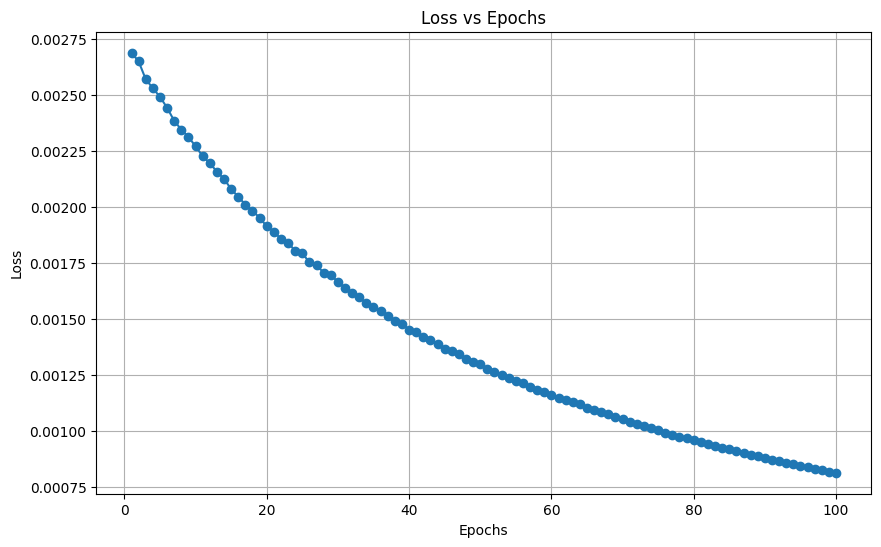

In [83]:
plt.figure(figsize=(10, 6))
plt.plot(range(1, 101), epoch_loss_list, marker='o', linestyle='-')
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Loss vs Epochs")
plt.grid(True)
plt.show()